# Magnetic Torque

## Exp 1
### $\mu B = rmg$
### $B = 1.36 \times 10^{-3} \cdot I (T/A)$

In [2]:
ball_mass = 141*(1e-3)
weight = 2e-3
ball_radius = 52.85*(1e-3)/2
ball_and_handle_length = 63.5*(1e-3)

In [3]:
lengths, currents = [], []
with open("exp2_data/exp1.txt", "r") as f:
    N = int(f.readline())
    for _ in range(N):
        l, c = map(float, f.readline().split())
        lengths.append(l*1e-3)
        currents.append(c)
lengths, currents

([0.039, 0.045, 0.048, 0.053, 0.059000000000000004], [2.4, 2.5, 2.6, 2.7, 2.8])

In [4]:
rmg = [l*(ball_mass+weight)*9.8 for l in lengths]
rmg

[0.054654600000000005,
 0.06306300000000001,
 0.06726720000000001,
 0.07427420000000001,
 0.08268260000000002]

In [5]:
magnetics = [1.36e-3*i for i in currents]
magnetics

[0.003264,
 0.0034000000000000002,
 0.0035360000000000005,
 0.0036720000000000004,
 0.003808]

In [7]:
from scipy.optimize import curve_fit
import numpy as np

def lin_func(x, a, b):
    return a*x + b

popt, pcov = curve_fit(lin_func, np.array(magnetics), np.array(rmg))

In [10]:
magnetic_moment = popt[0]
magnetic_moment

49.46117652765457

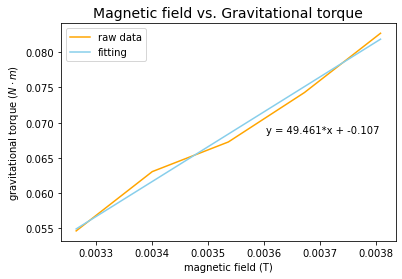

In [14]:
from matplotlib import pyplot as plt

plt.plot(np.array(magnetics), np.array(rmg), color="orange")
plt.plot(np.array(magnetics), lin_func(np.array(magnetics), *popt), color="skyblue")
plt.xlabel("magnetic field (T)")
plt.ylabel("gravitational torque $(N \cdot m)$")
plt.title("Magnetic field vs. Gravitational torque", size=14)
plt.figtext(0.6, 0.5, s=f"y = {popt[0]:.3f}*x + {popt[1]:.3f}")
plt.legend(["raw data", "fitting"])
plt.show()

## Exp 2
### $T^2 = \frac{4 {\pi}^2 I}{\mu B} where I = \frac{2}{5}mr^2$
### $T^2 \propto \frac{1}{B}$
### $\mu = \frac{4 {\pi}^2 I}{T^2 B}$
### ground truth $\mu = 0.4 Am^2$

In [15]:
periods = []
currents = []
with open("exp2_data/exp2.txt", "r") as f:
    N = int(f.readline())
    for _ in range(N):
        p20, c = map(float, f.readline().split())
        periods.append(p20/20)
        currents.append(c)
periods, currents

([1.6804999999999999, 1.3325, 1.1685, 1.0474999999999999, 0.9435],
 [1.0, 1.5, 2.0, 2.5, 3.0])

In [20]:
magnetics = [1.36e-3*i for i in currents]
m_reciprocal = [1/b for b in magnetics]
m_reciprocal

[735.2941176470588,
 490.19607843137254,
 367.6470588235294,
 294.11764705882354,
 245.09803921568627]

In [21]:
p_square = [p**2 for p in periods]
p_square

[2.8240802499999997,
 1.77555625,
 1.3653922500000002,
 1.0972562499999998,
 0.89019225]

In [22]:
popt, pcov = curve_fit(lin_func, np.array(p_square), np.array(m_reciprocal))
popt[0]

255.640980810299

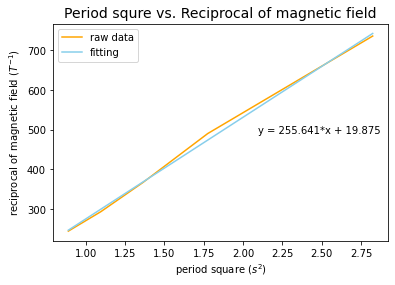

In [24]:
plt.plot(np.array(p_square), np.array(m_reciprocal), color="orange")
plt.plot(np.array(p_square), lin_func(np.array(p_square), *popt), color="skyblue")
plt.xlabel("period square $(s^{2})$")
plt.ylabel("reciprocal of magnetic field $(T^{-1})$")
plt.title("Period squre vs. Reciprocal of magnetic field", size=14)
plt.figtext(0.6, 0.5, s=f"y = {popt[0]:.3f}*x + {popt[1]:.3f}")
plt.legend(["raw data", "fitting"])
plt.show()

In [26]:
moment_inertia = 0.4*(ball_mass)*(ball_radius**2)
moment_inertia

3.9383027250000005e-05

In [27]:
denominator = np.mean([m*p for m, p in zip(magnetics, p_square)])
denominator

0.003707881288

In [28]:
magnetic_moment = 4*(np.pi**2)*moment_inertia/denominator
magnetic_moment

0.41931752274030426

## Exp 3
### $L = I\omega \quad (I = \frac{2}{5}mr^2)$
### ${\Omega}_p = \frac{\mu}{L} B = \frac{2\pi}{T}$

In [49]:
periods, currents = [], []
with open("exp2_data/exp3.txt", "r") as f:
    N = int(f.readline())
    for _ in range(N):
        p, i = map(float, f.readline().split())
        periods.append(p)
        currents.append(i)

freq, periods, currents

(3.7, [38.51, 18.77, 11.07, 7.27, 5.32], [1.0, 1.5, 2.0, 2.5, 3.0])

In [50]:
magnetics = [1.36e-3*b for b in currents]
magnetics

[0.00136, 0.00204, 0.00272, 0.0034000000000000002, 0.00408]

In [51]:
omega_p = [2*np.pi/t for t in periods]
omega_p

[0.16315723986444006,
 0.3347461538188378,
 0.5675867486160421,
 0.8642620780164493,
 1.181049869770599]

In [52]:
popt, pcov = curve_fit(lin_func, np.array(magnetics), np.array(omega_p))
popt[0]

377.25017352291616

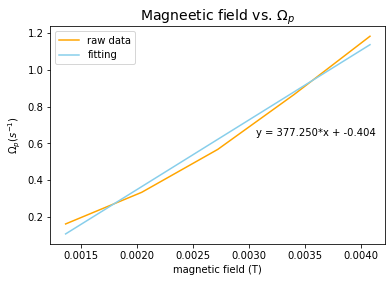

In [53]:
plt.plot(np.array(magnetics), np.array(omega_p), color="orange")
plt.plot(np.array(magnetics), lin_func(np.array(magnetics), *popt), color="skyblue")
plt.xlabel("magnetic field (T)")
plt.ylabel("${\Omega}_p (s^{-1})$")
plt.title("Magneetic field vs. ${\Omega}_p$", size=14)
plt.figtext(0.6, 0.5, s=f"y = {popt[0]:.3f}*x + {popt[1]:.3f}")
plt.legend(["raw data", "fitting"])
plt.show()

In [59]:
moment_inertia/np.mean(periods)

2.432853178280208e-06